<a href="https://colab.research.google.com/github/LYX-AI/Keyword_Extraction_NLP_Project/blob/main/Copy_of_Keyword_Extraction_NLP_Project_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#将本次项目的文件和文件夹都保存到Google Drive上
#挂载 Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#创建路径
import os

# 在 Google Drive 中创建目录
drive_path = '/content/drive/MyDrive/Kaggle/01Keyword_Extraction_NLP_Project_for_Beginners'
os.makedirs(drive_path, exist_ok=True)  # 创建目录，如果已经存在则不报错


In [ ]:
#保存文件到 Google Drive：
import shutil
source_folder = '/content/input/nips-papers-1987-2019-updated/'  # 当前文件夹路径

# 假设你已经上传了文件到 Colab
for filename in os.listdir(source_folder):
    file_path = os.path.join(source_folder, filename)  # 源文件路径
    if os.path.isfile(file_path):  # 如果是文件
        shutil.move(file_path, os.path.join(drive_path, filename))  # 移动到 Google Drive
    elif os.path.isdir(file_path):  # 如果是子文件夹
        shutil.move(file_path, os.path.join(drive_path, filename))  # 移动子文件夹

# 验证文件是否保存成功
os.listdir(drive_path)


['papers.csv', 'authors.csv']

In [ ]:
#从Drive中加载到Colab中
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Kaggle/01Keyword_Extraction_NLP_Project_for_Beginners'
# 检查文件是否存在
print(os.listdir(drive_path))

# 加载数据集
authors_df = pd.read_csv(os.path.join(drive_path, 'authors.csv'))
papers_df = pd.read_csv(os.path.join(drive_path, 'papers.csv'))

# 查看数据的前几行
authors_df.head(), papers_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['papers.csv', 'authors.csv']


(   source_id first_name    last_name institution
 0         27       Alan       Murray         NaN
 1         27    Anthony        Smith         NaN
 2         27        Zoe       Butler         NaN
 3         63      Yaser  Abu-Mostafa         NaN
 4         60    Michael     Fleisher         NaN,
    source_id  year                                              title  \
 0         27  1987                         Bit-Serial Neural Networks   
 1         63  1987                        Connectivity Versus Entropy   
 2         60  1987        The Hopfield Model with Multi-Level Neurons   
 3         59  1987                               How Neural Nets Work   
 4         69  1987  Spatial Organization of Neural Networks: A Pro...   
 
   abstract                                          full_text  
 0      NaN  573 \n\nBIT - SERIAL NEURAL  NETWORKS \n\nAlan...  
 1      NaN  1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser  S...  
 2      NaN  278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL 

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rowhitswami_nips_papers_1987_2019_updated_path = kagglehub.dataset_download('rowhitswami/nips-papers-1987-2019-updated')

print('Data source import complete.')


In this notebook, we're going to break down the most popular _keyword extraction_ algorithms. At the end, we'll create a small web application that takes a PDF file of an article (on any topic) and returns the keywords. To build the app, we'll need to go beyond this notebook and write a .py file, so when you're ready, follow the link here or in the bottom section to continue.

Enjoy your learning!

---

## 1. What is Keyword Extraction?

Keyword extraction is the process of selecting words or phrases from text that best reflect its content. Keywords convey the concentrated meaning of the text and can be used for categorization or retrieval.

![image.png](attachment:7fbca9ff-8142-4789-84ff-34defbe74443.png)

### General approach

![image.png](attachment:67946850-f573-4005-af03-bf562efb8c4e.png)

There are different methods of keyword extraction. But all of them have the following steps:

- **Candidate Generation**: First up, we cast a wide net to catch potential keywords
- **Candidate Scoring**: Next, we score each candidate based on how well they represent the text's main themes
- **Candidate Ranking**: Finally, we rank these words based on their scores. The top performers get the title of "keywords," ready to reflect the core ideas of the text.

### Keyword Extraction Techniques

Let's explore some of the most common techniques for keyword extraction. This is _just a brief overview_ of the algorithms we will cover in this notebook. If you don't understand what it's about, that's okay. A little later we'll break down how each algorithm works.

All algorithms for keyword extraction can be categorized(分类) into statistical(统计), graph-based or word2vec (or deep networks) based algorithms. There are also algorithms based on machine learning, but we will not discuss them in this notebook. Just be aware of them.
关键词提取的核心任务是从文本中找出最能代表其内容的词汇或短语。通过候选生成、评分和排序的步骤，我们可以有效地提取文本的核心思想。

算法分类：关键词提取的算法可以分为几大类，主要包括统计方法（如TF-IDF）、基于图的算法、深度学习（如word2vec）等。理解这些算法能帮助我们选择合适的方法来处理不同类型的文本数据。

统计方法简介：

TF-IDF：通过计算词频和逆文档频率，找到在特定文档中独特而重要的词汇。

Rake：通过分析词汇出现频率和共现关系来识别关键词，适合快速的文本分析。

Yake：类似于Rake，但通过更复杂的统计特征进行优化，识别文本中不仅常见而且特别重要的词汇。

这些方法是关键词提取领域的基础，理解它们能够帮助你在处理实际文本时选择合适的算法。



一下三种方法是上面讲解的基于统计学的方法实现的算法
#### Statistical Approaches
- **TF-IDF** (Term Frequency-Inverse Document Frequency). This is a classic, folks. TF-IDF measures how important a word is to a document in a collection of documents. It’s like finding out which words in your document are the real VIPs because they're not commonly used elsewhere.
- **Rake** (Rapid Automatic Keyword Extraction). Rake is pretty straightforward and efficient. It identifies key phrases in text by analyzing the frequency of word appearance and its co-occurrence with other words. Think of it as highlighting the standout phrases based on how often words show up together.
- **Yake**. Yake takes a unique twist by using statistical features to rank keywords within a text based on their singularity and relevancy. It’s like having a smart assistant that picks out terms that are not just common, but also particularly significant in your text.

TF-IDF：这个算法基于词频（TF）和逆文档频率（IDF）来计算词语在文档中的重要性。它能够帮助我们发现那些在某一特定文档中频繁出现，但在所有文档中都不常见的词语，这些通常是该文档的关键词。

Rake：Rake算法通过分析词语的共现关系（即哪些词语经常一起出现）和出现的频率来快速识别关键词。它通常不需要像TF-IDF那样依赖大规模的语料库，可以快速识别文本中的关键短语。

Yake：Yake也是一种基于统计的关键词提取算法，它类似于Rake，但引入了更多的统计特征来提高关键词提取的准确性。它不仅关注词语的频率，还会考虑其他因素，如词汇的独特性和与其他词的相关性，从而帮助识别文本中的关键内容。

#### Graph-based Approaches **bold text**
- **TextRank**. Imagine a system where words are nodes in a graph, connected based on their co-occurrence within a text. TextRank ranks these nodes (words) to figure out which are the most influential in the text. It’s like seeing which friend (word) in your social circle (document) is the most popular.
- **SingleRank**. SingleRank takes TextRank a step further by adding weight to the connections between words based on their co-occurrence frequency. It’s akin to saying, not only is this friend popular, but their connections are super strong because they hang out together a lot.
- **TopicRank**. TopicRank: This one groups words into clusters or topics first, and then performs a ranking similar to TextRank on these topics. It’s like organizing your friends into cliques and figuring out which clique is the life of the party.

#### Deep Learning Techniques
- **Word Embeddings** for Keyword Extraction. Deep learning brings us word embeddings, where words are converted into vector space models. This technique helps in extracting keywords by understanding the semantic richness of words, almost like capturing the essence of words in a mathematical form, which can really pinpoint the key concepts in a text.

---

### Applications of Keyword Extraction

It's important to understand why keyword extraction is necessary. It seems that this is not as interesting a task as extracting named entities or training a neural network to generate text. But it is still a very important task.

So, you can use Keywords for:

- **Information Retrieval**: Enhancing search engine performance by indexing documents based on their keywords.
- **Content Summarization**: Generating concise summaries of large texts.
- **Document Clustering and Classification**: Organizing documents into categories based on their keywords.
- **Trend Analysis**: Identifying emerging trends in large datasets by analyzing frequently occurring keywords.
基于图的算法（如TextRank、SingleRank和TopicRank）使用图结构来理解词语之间的关系，这些算法可以通过计算词语在文本中的连接强度来识别关键词。TextRank看词语的整体影响力，SingleRank则通过共现频率进一步加权，TopicRank则在分组主题之后进行排名。

深度学习技术（如词嵌入）为关键词提取提供了更为智能和精确的方法。通过将词语转化为向量，算法不仅关注词语的频率，还可以捕捉其在文本中的深层语义，使得关键词提取更加精准。

以上都是一些关键词提取的算法我个人认为首次学习不用花太多时间搞懂它是干啥的
---

## 2. Dataset Overview and EDA（了解项目用到的数据集）

Before we break down each algorithm and put it into practice, let's look at the data we have. We want to understand the structure, size, and nature of our dataset.

The NIPS (NeurIPS) paper dataset comprises thousands of research papers from the annual Neural Information Processing Systems conference. These papers cover a wide array of topics in machine learning, artificial intelligence, and statistics. The dataset typically includes titles, abstracts, full text of the papers, authors, and sometimes the keywords provided by the authors.

### Setting Up the Environment

First, ensure you have imported all necessary libraries and have the dataset ready. Kaggle datasets can typically be accessed directly within Kaggle notebooks through relative paths. If you are running this notebook locally, make sure that the imported libraries are installed in your environment.

In [ ]:
#上传数据集

#1.上传kaggle的API key
from google.colab import files
files.upload()  # 运行后，Colab会提示你选择文件


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dmhl1991121","key":"85cca2fecbf2e0d6b5dd045dea8dedc7"}'}

In [ ]:
# 创建Kaggle目录
!mkdir -p ~/.kaggle

In [ ]:
# 移动上传的 kaggle.json 文件到正确的目录
!mv kaggle.json ~/.kaggle/

In [ ]:
# 设置文件的权限
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -la ~/.kaggle


total 16
drwxr-xr-x 2 root root 4096 Jun 17 16:35 .
drwx------ 1 root root 4096 Jun 17 16:23 ..
-rw------- 1 root root   67 Jun 17 16:35 kaggle.json


In [ ]:
#验证API是否导入成功
!kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data            Extrovert vs. Introvert Behavior Data                    31277  2025-06-13 14:26:48.303000          19056        416  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025         Global AI Job Market & Salary Trends 2025               529004  2025-06-01 07:20:49.537000           7392        119  0.9411765        
adilshamim8/social-media-addiction-vs-relationships             Students' Social Media Addiction                          7851  2025-05-10 14:38:02.713000          18529        279  1.0              


In [ ]:
#从kaggle上下载数据集
!kaggle datasets download -d nips-papers-1987-2019-updated

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/dmhl1991121/nips-papers-1987-2019-updated


根据以上代码结果可以看出无法顺利将数据集导入到colab，所以我选择手动从koggle上下载数据集然后再手动上传到../input/nips-papers-1987-2019-updated/  这个路径下

In [ ]:
#创建路径
import os

# 创建指定路径
path = '/content/input/nips-papers-1987-2019-updated/'
os.makedirs(path, exist_ok=True)  # 如果路径已存在，则不会报错


In [ ]:
from google.colab import files

# 上传文件
uploaded = files.upload()

# 将文件保存到指定路径
for filename in uploaded.keys():
    # 移动文件到指定路径
    os.rename(filename, os.path.join(path, filename))

print("文件已上传到：", path)


Saving authors.csv to authors.csv
Saving papers.csv to papers.csv
文件已上传到： /content/input/nips-papers-1987-2019-updated/


以下代码有个很重要的部分就是


```
from sklearn.feature_extraction.text import CountVectorizer
```
这是一个词汇出现频率的统计


```
文本1：I love machine learning  
文本2：Machine learning is fun

```
使用 CountVectorizer 后会变成这样的“词频矩阵”：



```
   i	love	machine	learning	is	fun
文本 1	 1	 1	   1	  0	  0
文本2 0	 0	 1	    1	   1   1
```



每个单词是一个“特征”，每行代表一个文本，数字表示该单词在这段文本中出现了几次。






In [2]:
import pandas as pd
import matplotlib.pyplot as plt#画图的库
import seaborn as sns #画图使用的库
from sklearn.feature_extraction.text import CountVectorizer#把文字装换成机器可以看懂的数字向量
import numpy as np#数值运算的基础库

# Display plots inline and set default figure size
#%matplotlib inline 是 Jupyter/Colab 的“魔法命令”，作用是：图表直接显示在代码下面。设置图像默认的大小，方便观察。
#plt.rcParams['figure.figsize']设置图像默认的大小，方便观察。
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# Assuming the dataset is loaded into a Kaggle notebook with the filename 'nips_papers.csv'
nips_papers = pd.read_csv('../content/drive/MyDrive/Kaggle/01Keyword_Extraction_NLP_Project_for_Beginners/papers.csv')

In [4]:
nips_papers.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


### Exploring the Dataset Structure

Let's begin with examining the first few rows, the data types of each column, and checking for missing values.

In [ ]:
nips_papers.head()

For this project, we are most interested in the full_text column. It contains the text of the abstract and the paper.

In [5]:
print(nips_papers.isnull().sum())

source_id       0
year            0
title           0
abstract     3319
full_text       3
dtype: int64


以上代码是用来统计每一列中的空行情况
比如：
**title	abstract	year**
Deep Learning	Neural nets...	2015
(空)	GANs are...	2016
CNN Paper	(空)	2015

title       1
abstract    1
year        0
------------------------------------------------
这么做的意义是什么
✅ 这行代码的意义是什么？
在做任何机器学习或文本处理之前，我们必须了解数据质量，特别是：

哪些列有缺失（空白）？

缺失的数量大不大？

是不是需要填补或者删除？

如果你不知道哪些地方是空的，后续的模型会报错，或者结果不准确。

full_text is missing in only three rows. But there are more than three thousand rows where abstract text is missing.

### Cleaning the Data

We'll just get rid of rows that don't have full_text.

根据上述代码nips_papers.isnull(),会把空白的表格用True填充上

In [6]:
# Dropping rows where 'abstract' is missing
nips_papers.dropna(subset=['full_text'], inplace=True)
#删除full_text这一列中的空值，inplace=True直接在原来的 nips_papers 表上改，不新建副本。
# Reset index after dropping rows 重新整理表格的行号（index），让它从 0 开始递增，并去掉原来的行号。
nips_papers.reset_index(drop=True, inplace=True)

### Analyzing Trends

Look for trends such as the number of papers published over the years. This can provide insights into the dataset's coverage and any growth trends in the field of machine learning and NLP.

关于下面说的 Series类型这里举个例子
year	title
1987	"Paper A"

```
1987	"Paper B"
1988	"Paper C"
1989	"Paper D"
1989	"Paper E"
1989	"Paper F"

papers_per_year = nips_papers.groupby('year')['title'].count()

year
1987    2
1988    1
1989    3
Name: title, dtype: int64
```










```
papers_per_year.plot(kind='line', marker='o', title='NIPS Papers per Year')

```
含义：
用 matplotlib 画一张折线图：

kind='line' 表示是折线图。

marker='o' 表示数据点用圆圈标出来（让图更清楚）。

title='NIPS Papers per Year' 是图的标题。


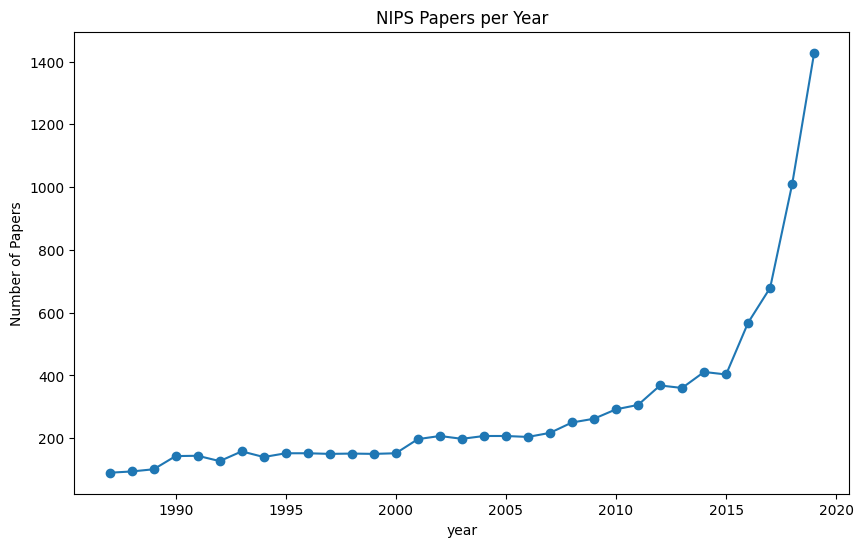

In [7]:
# Plotting the number of papers per year
'''
返回的是一个 Pandas 的 Series 对象，我这里把他理解成一个python中的字典类型
'''
papers_per_year = nips_papers.groupby('year')['title'].count()
papers_per_year.plot(kind='line', marker='o', title='NIPS Papers per Year')
'''
设置 y 轴的名字为 “Number of Papers”（论文数量）。
'''
plt.ylabel('Number of Papers')
plt.show()

### Keyword Frequency Analysis

Before diving into keyword extraction, analyzing the most frequent words in your texts (e.g., paper titles or abstracts) can give you a preliminary idea of common themes.

以下代码的例子：
我们想知道在论文的全文摘要（full_text）中，最常出现的是哪些单词，并将它们可视化出来。



```
vec = CountVectorizer(stop_words='english', max_features=100)

```
stop_words='english' 表示自动忽略像 “the”“and”“is” 这类无意义的英语停用词。

max_features=100 表示最多只保留最常出现的100个单词。



```
word_counts = vec.fit_transform(nips_papers['full_text'])
```
fit
扫描所有的文本（也就是 nips_papers['full_text']）：
建立一个“词汇表” vocabulary，比如：
{'neural': 0, 'learning': 1, 'network': 2, 'data': 3, ...}
这里直接举个例子可以更加深刻的理解
有一个对象


```
texts = [
  "deep learning is fun",
  "machine learning is powerful",
  "deep neural network"
]

```
再通过CountVectorizer后得到的对象是


```
{'deep': 0, 'learning': 1, 'is': 2, 'fun': 3, 'machine': 4, 'powerful': 5, 'neural': 6, 'network': 7}

```

对应的稀疏举证是是
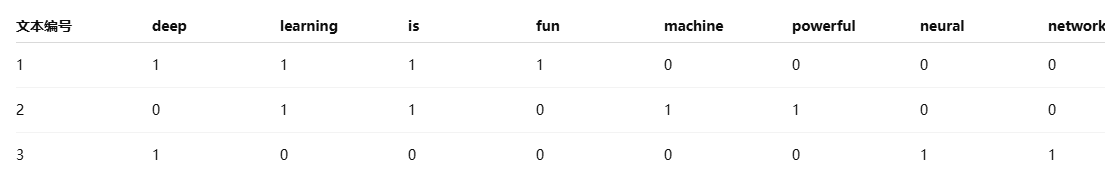











In [ ]:

vec = CountVectorizer(stop_words='english', max_features=100)
word_counts = vec.fit_transform(nips_papers['full_text'])
sum_words = word_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Plotting the top 20 words
df_words_freq = pd.DataFrame(words_freq[:30], columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=df_words_freq, palette='Blues_d')
plt.title('Top 30 Most Frequent Words in NIPS Abstracts')
plt.show()

High-frequency words not filtered out by the standard stop words list but still irrelevant to content (like 'paper' or 'results') might need custom stop words processing or advanced techniques like TF-IDF to reduce their impact.

## 3. Data Preprocessing

### NLTK, spacy

Two of the most popular Python libraries for these tasks are NLTK and spaCy.

- [NLTK (Natural Language Toolkit)](https://www.nltk.org/) is widely used for teaching and research. It's a comprehensive library featuring many utilities for classical NLP tasks and text processing.
- [spaCy](https://spacy.io/) is known for its fast processing speeds and ease of use. It also provides pre-trained models and word vectors and is designed specifically for production use.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

### Tokenization

Tokenization is the process of splitting text into meaningful units such as words, sentences, or tokens. This is typically the first step in text preprocessing.

_*Running this cell takes time_

In [ ]:
from nltk.tokenize import word_tokenize

# Using NLTK for tokenization
nips_papers['tokens'] = nips_papers['full_text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

### Stopwords removal

Stopwords are commonly used words (such as "the", "a", "an", "in") that are often removed in the preprocessing phase because they carry less meaningful information for analysis.

In [ ]:
from nltk.corpus import stopwords

# Load general English stopwords
stop_words = set(stopwords.words('english'))

When dealing with specialized datasets like NIPS papers, you might encounter domain-specific stopwords like "neural", "network", "learning", which are overly frequent and might be less informative for certain analyses.

In [ ]:
# Define custom stopwords for NIPS context
custom_stopwords = {"cid", "neural", "network", "learning", "model", "algorithm", "data",
                    "set", "function", "problem", "models", "number", "figure", "results",
                   "information", "distribution", "using", "used", "use", "given", "method",
                   "neural", "networks"}

# Function to remove both general and custom stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words and
            token.lower() not in custom_stopwords and not token.isdigit()]

nips_papers['filtered_tokens'] = nips_papers['tokens'].apply(remove_stopwords)

### Stemming

Stemming reduces words to their word stem, base, or root form. For example, "fishing", "fished", "fisher" all reduce to the stem "fish".

_*Running this cell takes time_

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to stem tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

nips_papers['stemmed_tokens'] = nips_papers['filtered_tokens'].apply(stem_tokens)

In [ ]:
nips_papers['stemmed_tokens'][0]

### *To fix: Lemmatization

Lemmatization, similar to stemming, reduces words to their base or root form, but it ensures that the root word belongs to the language.

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the filtered tokens
nips_papers['lemmatized_tokens'] = nips_papers['filtered_tokens'].apply(lemmatize_tokens)

## 4. Algorithms

### TF-IDF for Keyword Extraction

![image.png](attachment:31a52603-1d81-4846-844a-79c77f5fac43.png)

- **Calculate Term Frequency (TF)**: For each word in your document, calculate the term frequency. This is simply the number of times a word appears in a document divided by the total number of words in that document.

$$
\text{TF}(word) = \frac{\text{Number of times the word appears in a document}}{\text{Total number of words in the document}}
$$

    
- **Calculate Inverse Document Frequency (IDF)**: This measures how common or rare a word is across all documents. It is calculated as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

$$
\text{IDF}(word) = \log\left(\frac{\text{Total number of documents}}{\text{Number of documents containing the word}}\right)
$$
    
- **Compute TF-IDF: Multiply TF by IDF.** The words with the highest TF-IDF scores are considered the most relevant keywords in the document.

$$
\text{TF-IDF}(word) = \text{TF}(word) \times \text{IDF}(word)
$$

Very simple, huh?

Let's implement this algorithm in pure Python.

In [ ]:
import math

def compute_tf(tokenized_docs):
    tf_dicts = []
    for doc in tokenized_docs:
        tf_dict = {}
        total_terms = len(doc)
        for term in doc:
            tf_dict[term] = tf_dict.get(term, 0) + 1 / total_terms
        tf_dicts.append(tf_dict)
    return tf_dicts

def compute_df(tokenized_docs):
    df_dict = {}
    for doc in tokenized_docs:
        for term in set(doc):
            df_dict[term] = df_dict.get(term, 0) + 1
    return df_dict

def compute_idf(df_dict, total_docs):
    idf_dict = {}
    for term, count in df_dict.items():
        idf_dict[term] = math.log(total_docs / count)
    return idf_dict

def compute_tf_idf(tf_dicts, idf_dict):
    tf_idf_dicts = []
    for tf_dict in tf_dicts:
        tf_idf_dict = {}
        for term, tf in tf_dict.items():
            tf_idf_dict[term] = tf * idf_dict.get(term, 0)
        tf_idf_dicts.append(tf_idf_dict)
    return tf_idf_dicts

def select_top_keywords(tf_idf_dicts, top_n=5):
    top_keywords = []
    for tf_idf_dict in tf_idf_dicts:
        sorted_terms = sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True)
        top_keywords.append([term for term, score in sorted_terms[:top_n]])
    return top_keywords

In [ ]:
tokenized_docs = nips_papers['stemmed_tokens'].tolist()
tf_dicts = compute_tf(tokenized_docs)
df_dict = compute_df(tokenized_docs)
total_docs = len(tokenized_docs)
idf_dict = compute_idf(df_dict, total_docs)
tf_idf_dicts = compute_tf_idf(tf_dicts, idf_dict)
top_tf_idf_keywords = select_top_keywords(tf_idf_dicts)

# Update the DataFrame
nips_papers['tf_idf_keywords'] = top_tf_idf_keywords

In [ ]:
nips_papers['tf_idf_keywords'][99]

---
### TextRank ± filter punct.symbols, build graph

_You might want to know how [PageRank](https://www.cis.upenn.edu/~mkearns/teaching/NetworkedLife/pagerank.pdf) algorithm works._

![image.png](attachment:284b26a2-ced0-4091-9d48-8b7e9c148884.png)

This algorithm is based on graphs. The idea is that after you get tokens from the text, you represent each token as a vertex of the graph. The links between these vertices are created when tokens occur close to each other in the text (i.e., we assume they are somehow related).

The importance of each vertex is calculated using a method similar to PageRank. This involves iteratively assigning scores to each vertex based on the scores of its neighboring vertices.

Use the networkx library to apply the PageRank algorithm on the graph.

In [ ]:
import networkx as nx

def build_graph(words, window_size=4):
    G = nx.Graph()
    for index, word in enumerate(words):
        for i in range(index + 1, index + window_size):
            if i >= len(words):
                break
            node1, node2 = word, words[i]
            if node1 != node2:
                if G.has_edge(node1, node2):
                    G[node1][node2]['weight'] += 1
                else:
                    G.add_edge(node1, node2, weight=1)
    return G

def extract_keywords(G):
    ranks = nx.pagerank(G, weight='weight')
    sorted_ranks = sorted(ranks.items(), key=lambda x: x[1], reverse=True)
    return [word for word, rank in sorted_ranks[:5]]  # Adjust the number of keywords as needed

def apply_text_rank(tokens):
    graph = build_graph(tokens)
    return extract_keywords(graph)

_*Running this cell takes time_

In [ ]:
# Apply TextRank to DataFrame
nips_papers['text_rank_keywords'] = nips_papers['stemmed_tokens'].apply(apply_text_rank)

In [ ]:
nips_papers['text_rank_keywords'][0]

Of course, we will not visualize the full graph here. It is too large and there is little sense in it. But we can visualize a part of the graph for certain vertices.

In [ ]:
def visualize_keyword_subgraph(graph, keywords):
    # Find nodes and neighbors
    subgraph_nodes = set(keywords)
    for keyword in keywords:
        subgraph_nodes.update(graph.neighbors(keyword))

    subgraph = graph.subgraph(subgraph_nodes)

    # Draw the subgraph
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color='lightgreen', edge_color='#BBBBBB', node_size=300)
    plt.show()

# Example usage: visualize subgraph for specific keywords
keywords = ['speech', 'vision']
visualize_keyword_subgraph(graph, keywords)

**SingleRank** and **TopicRank** are some variations ofr TextRank.

---

### Rake

The RAKE algorithm is designed to efficiently identify key phrases from a text by analyzing the frequency of word appearance and its co-occurrence with other words in the text.

RAKE starts by splitting the text into an array of words and phrases. It specifically looks for phrases by splitting the text at delimiters, which are typically punctuation marks and stop words.

Each word is scored based on its frequency and its degree (the total number of times it appears in different phrases). The score is calculated using a formula:

$$
\text{Score(word)} = \frac{\text{degree(word)}}{\text{frequency(word)}}
$$

where:
- $\text{degree(word)}$ is the number of times a word co-occurs with other words across all phrases.
- $\text{frequency(word)}$ is the number of times the word appears in the entire text.

Phrases are scored by summing the scores of the words they contain. This step emphasizes multi-word expressions that are more likely to represent key concepts.

Then, the highest-scoring phrases are selected as the key phrases for the text.

We aren't gonna implement this algorithm form scratch. Instead, we are going to use python package pke: https://github.com/boudinfl/pke

In [ ]:
!pip install git+https://github.com/boudinfl/pke.git
!python -m spacy download en_core_web_sm

In [ ]:
import pke

# Initialize RAKE extractor
extractor = pke.unsupervised.RAKE()

# Sample text
text = "Compatibility of systems of linear constraints over the set of natural numbers. " \
       "Criteria of compatibility of a system of linear Diophantine equations, strict " \
       "inequations, and nonstrict inequations are considered."

# Load the text into the extractor
extractor.load_document(input=text, language='en')

# Select the longest sequence of nouns and adjectives as candidates.
extractor.candidate_selection()

# Calculate scores using the default scoring function
extractor.candidate_weighting()

# Get the 5 highest scored candidates
keywords = extractor.get_n_best(n=5)

# Print extracted keywords
print(keywords)

---

### YAKE!

YAKE! (Yet Another Keyword Extraction) designed to automatically detect keywords in text using an unsupervised approach. This algorithm leverages statistical features from the text itself without needing any external data.

YAKE! calculates a set of features for each word in the text, including:
- Case insensitivity: Emphasizes lower-case versions of words.
- Word position: Early occurrences may be more important.
- Word frequency: Frequent words are not necessarily important.
- Word relatedness to context: Looks at the co-occurrence of words within their surrounding text.
- Word differentiation: Identifies how spread out the word’s contexts are.

Using these features, YAKE! computes a score for each word. A lower score suggests a higher relevance as a keyword. The scoring formula accounts for the uniqueness of the word’s occurrence across the document and its significance in individual contexts.

After scoring, YAKE! selects the best-scoring words as keywords, paying attention to avoiding redundancy and favoring words that provide unique information.

this algorithm is useful for dealing with large documents or collections of documents where you need a quick and effective method to identify the most relevant keywords without prior training or configuration.

In [ ]:
import pke

# Initialize YAKE extractor
extractor = pke.unsupervised.YAKE()

# Sample text
text = "Natural language processing enables computers to understand human language. This technology powers many applications like speech recognition, machine translation, and sentiment analysis."

# Load the text into the extractor
extractor.load_document(input=text, language='en')

# Candidate selection with no specific n-gram size, using default parameters
extractor.candidate_selection()

# Candidate weighting using YAKE's default parameters
extractor.candidate_weighting()

# Get the 5 highest scored candidates
keywords = extractor.get_n_best(n=5)

# Print extracted keywords
print(keywords)

---

### Word Embeddings (keyBERT)

KeyBERT is a keyword extraction model that utilizes state-of-the-art natural language processing technology based on word embeddings, specifically leveraging models like BERT (Bidirectional Encoder Representations from Transformers). Unlike traditional keyword extraction methods that rely on statistical measures or graph-based representations, KeyBERT uses the semantic meanings of words as represented by their embeddings. Here's how KeyBERT works:

    Semantic Representation: KeyBERT first converts the text into a dense vector representation using a pre-trained language model (like BERT, RoBERTa, or DistilBERT). These embeddings capture the contextual relationships between words in the text.

    Similarity Calculation: It then calculates the cosine similarity between the embeddings of the document and the embeddings of candidate phrases or words extracted from the document. This step assesses how representative the phrases are of the document's main topics.

    Keyword Selection: Keywords are selected based on their similarity scores. The higher the score, the more relevant the word or phrase is to the overall context of the document.

KeyBERT's strength lies in its ability to understand the nuances of language due to the sophisticated nature of the embeddings used, allowing it to identify keywords that are contextually relevant rather than merely frequent or statistically significant.

In [ ]:
import pandas as pd
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer

# Sample data
data = {
    'full_text': [
        "Natural language processing enables computers to understand human language. This technology powers many applications like speech recognition, machine translation, and sentiment analysis.",
        "Machine learning provides systems the ability to automatically learn and improve from experience without being explicitly programmed. It's widely used in data analysis and complex algorithms."
    ]
}
df = pd.DataFrame(data)

# Load a model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Initialize KeyBERT with the loaded model
kw_model = KeyBERT(model=model)

# Function to extract keywords
def extract_keywords(text):
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', use_maxsum=True, nr_candidates=20, top_n=5)
    return keywords

# Apply the function to the 'full_text' column
df['keywords'] = df['full_text'].apply(lambda x: extract_keywords(x))

# Display the DataFrame with keywords
print(df[['full_text', 'keywords']])

In [ ]:
first_abstract = nips_papers.iloc[0]['abstract']
print("TF-IDF Keywords:", extract_keywords(first_abstract, 'tfidf'))
print("TextRank Keywords:", extract_keywords(first_abstract, 'textrank'))
print("YAKE Keywords:", extract_keywords(first_abstract, 'yake'))

## Building an App

We're going to build an application that allows users to upload file or paste a text into a website window and receive keywords.

![image.png](attachment:33e9fd66-c190-44bb-a2ae-ed2ffec1f902.png)

To do this, we'll need to create a project repository: we'll use **Flask** and a simple **Bootstrap template**, and also write some auxiliary code that will **process the received data** and **log everything that happens**. This is a great exercise for aspiring engineers who want not only to understand algorithms but also to apply them in real-world scenarios.

### [To continue this project visit my github](https://github.com/mlsamurai/keyword-extraction-project-nlp/blob/main/tutorial/Part%202.%20Application.ipynb/)

Please upvote this notebook if it was helpful for you and share if you know someone who might find it helpful! Thank you.

## References and Links